In [1]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib as mat
import seaborn as sns
import pandas as pd    
import numpy as np

pd.set_option('display.max_columns', None)  

In [2]:
df=pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')

# Level 0 Analysis

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [5]:
df.shape

(10692, 13)

In [6]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

# Level 1 Analysis:

In [9]:
def separate(df):
    categorical = []
    continuous = []
    for column in df.columns:
        if df[column].nunique()<100:
            categorical.append(column)
        else:
             continuous.append(column)
                
    return categorical, continuous 
categorical, continuous = separate(df)

table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [10]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") 
    print(f"Mode of {col} is {df[col].mode()[0]}")
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") 

In [11]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo
Number of missing values in city is 0


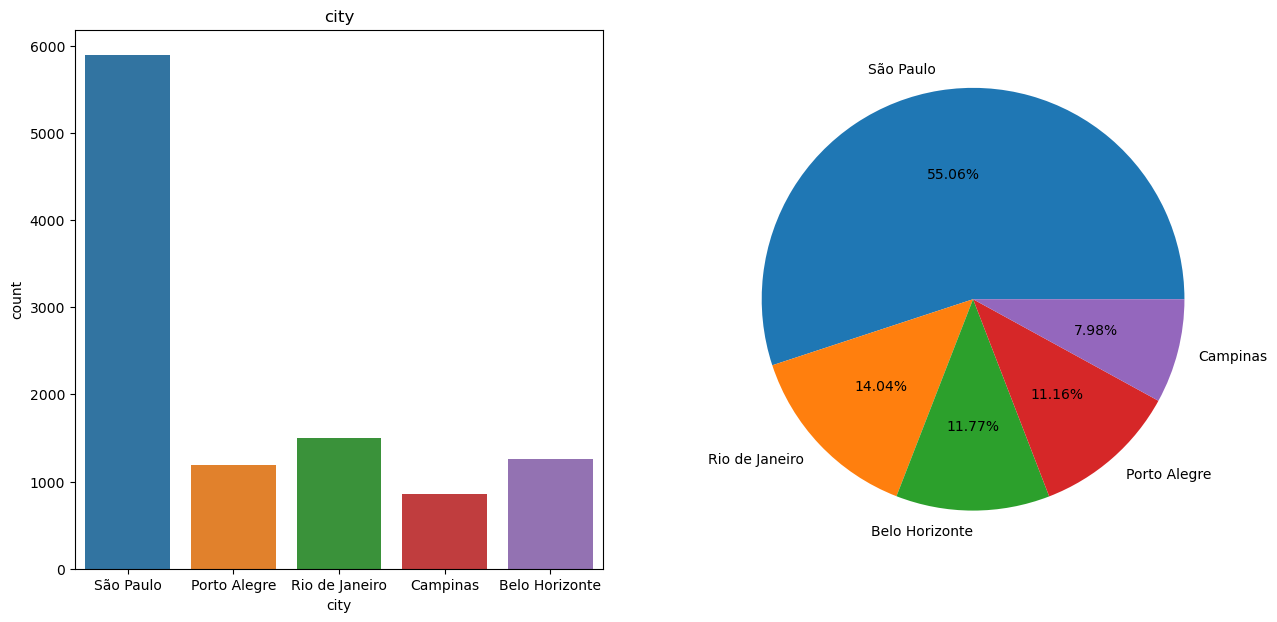

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("city")                  
percentage = df["city"].value_counts()        
labels = list(df["city"].value_counts().index)

sns.countplot(x = df["city"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### most of properties available for rent is in Sao Paulo(almost 6000 in count & consist of 55% of overall properties), followed by Rio de Janeiro(14%,around 1500 in count)

In [13]:
info_of_cat('rooms')

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is 3
Number of missing values in rooms is 0


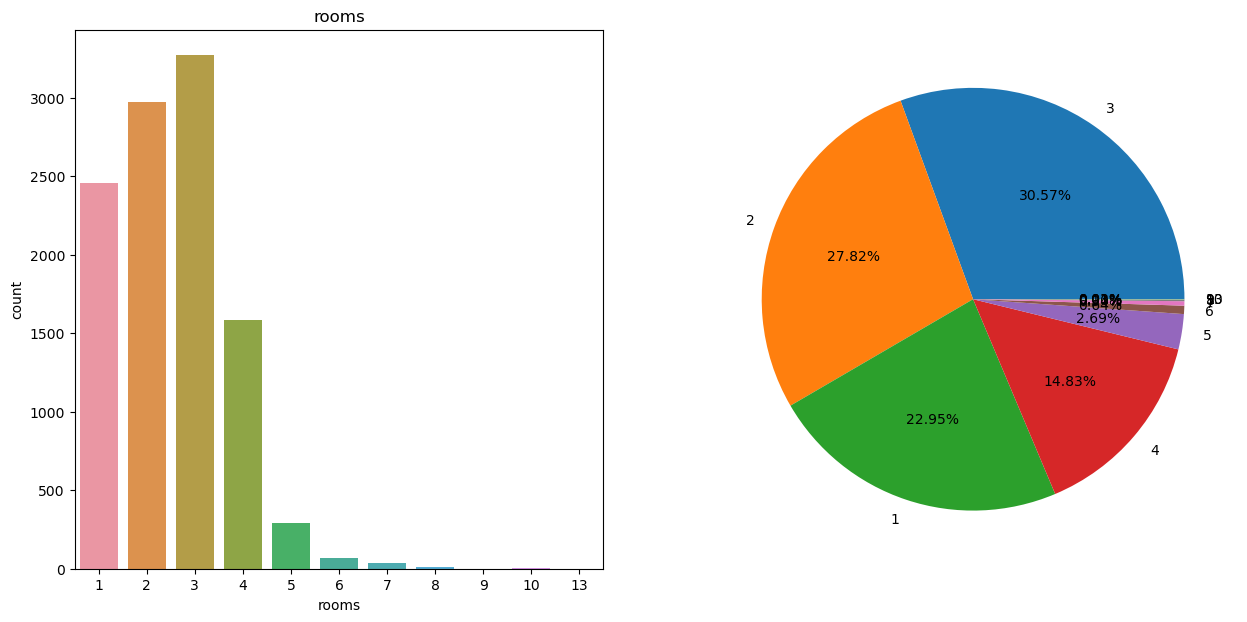

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("rooms")                  
percentage = df["rooms"].value_counts()        
labels = list(df["rooms"].value_counts().index)

sns.countplot(x = df["rooms"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### most of properties have 3 rooms(around 3500), followed by 2&1 rooms(around 3000,2500 respecitively). And around 1500+ properties consist of 4 rooms

In [15]:
info_of_cat('bathroom')

Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of bathroom is 1
Number of missing values in bathroom is 0


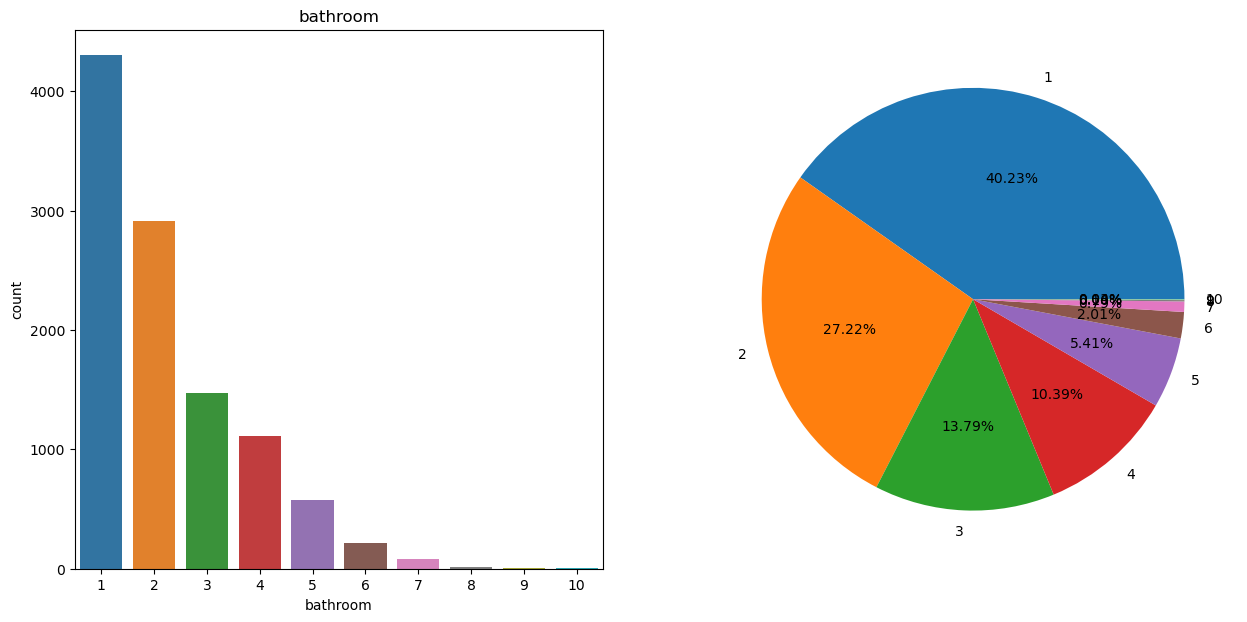

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("bathroom")                  
percentage = df["bathroom"].value_counts()        
labels = list(df["bathroom"].value_counts().index)

sns.countplot(x = df["bathroom"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### majority of properties consist of 1 bathroom that acquires around 40.23%(4500 in count),followed by 2,3&4 bathrooms consisting of 22.22%, 13.79%, 10.39% respecitively(around 3000,1500,1000+ in count)

In [17]:
info_of_cat('parking spaces')

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1
Number of missing values in parking spaces is 0


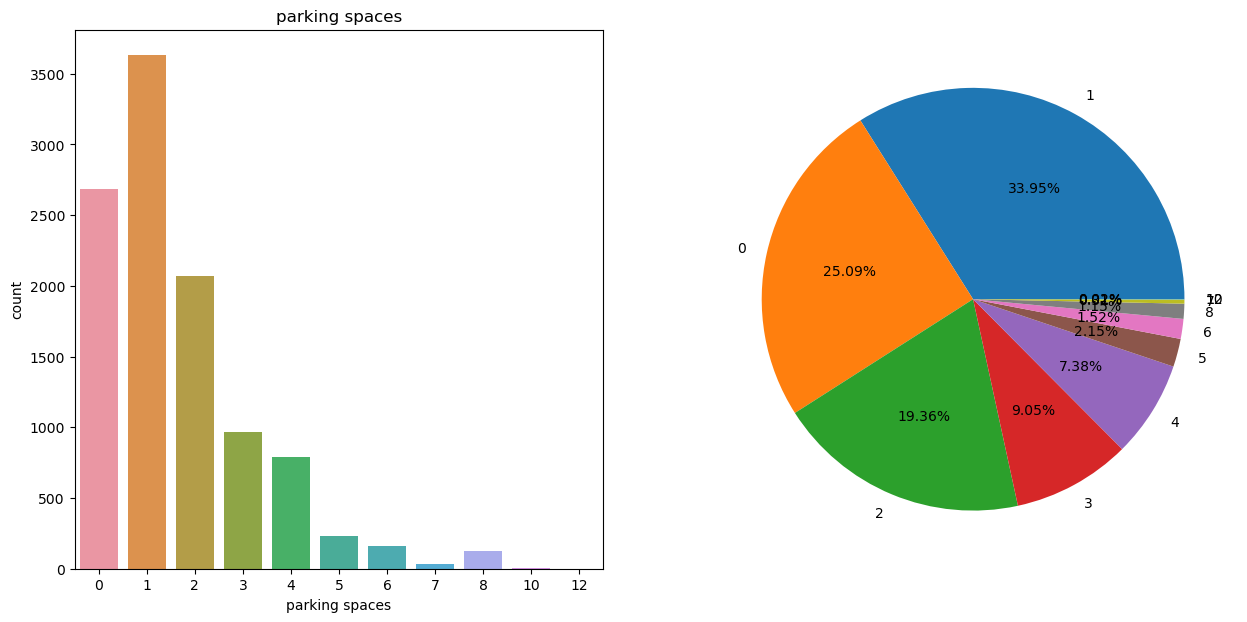

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("parking spaces")                  
percentage = df["parking spaces"].value_counts()        
labels = list(df["parking spaces"].value_counts().index)

sns.countplot(x = df["parking spaces"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### 3500 properties have 1 parking spaces and 2500+ have no parking space. And 2000 and 1000 properties have 2 and 3 parking spaces respectively

In [19]:
info_of_cat('floor')

Unique values in floor are: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
Mode of floor is 0
Number of missing values in floor is 0


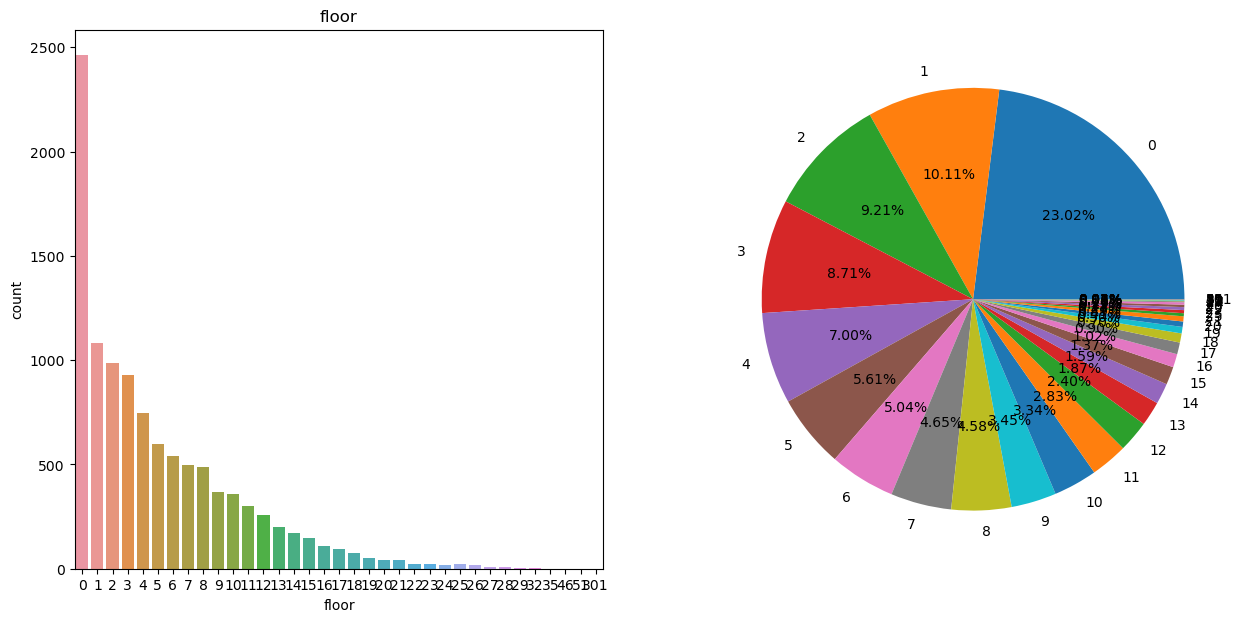

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("floor")                  
percentage = df["floor"].value_counts()        
labels = list(df["floor"].value_counts().index)

sns.countplot(x = df["floor"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### 2500 properties are present on ground floor, and properties consisting of 1,2,3 floor are 1000 each in count

In [21]:
info_of_cat('animal')

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in animal is 0


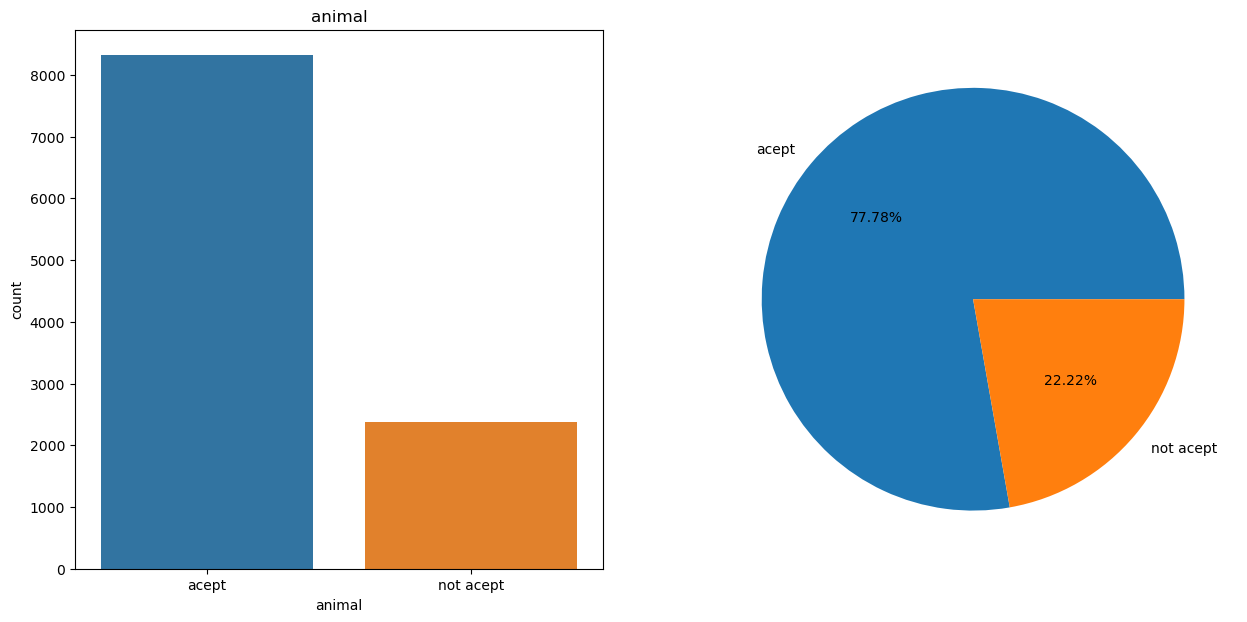

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("animal")                  
percentage = df["animal"].value_counts()        
labels = list(df["animal"].value_counts().index)

sns.countplot(x = df["animal"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### 8000+ properties allows pet animal whereas 2500 does not allows

In [23]:
info_of_cat('furniture')

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is not furnished
Number of missing values in furniture is 0


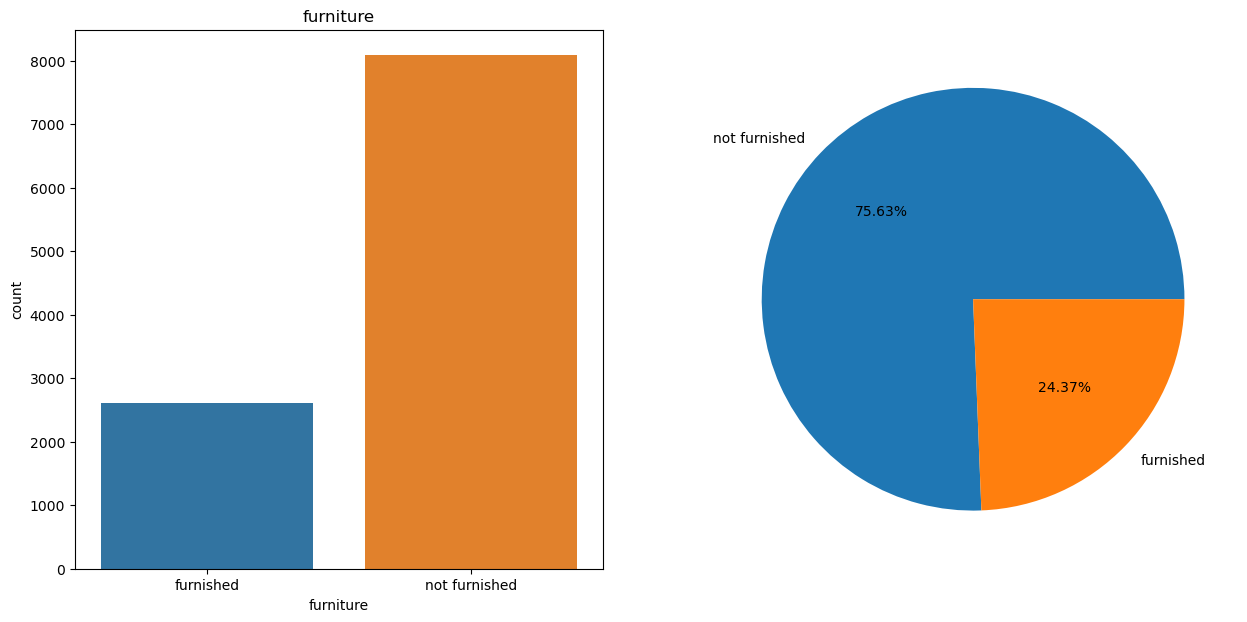

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("furniture")                  
percentage = df["furniture"].value_counts()        
labels = list(df["furniture"].value_counts().index)

sns.countplot(x = df["furniture"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### only 2500 properties are furnished and 8000 are not furnished

# Level 2 Analysis:

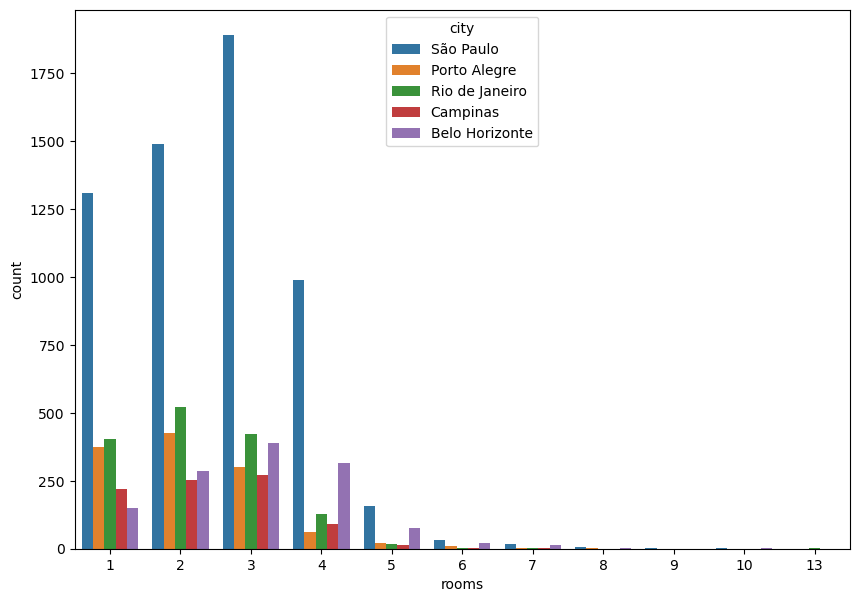

In [25]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "rooms", hue = "city", data = df)
plt.show()

### In Sao paulo city have 1,2,3,4 rooms options is easily available. and in all other cities we can get 1,2,3,4 rooms but these type of properties is limited in count for other cities

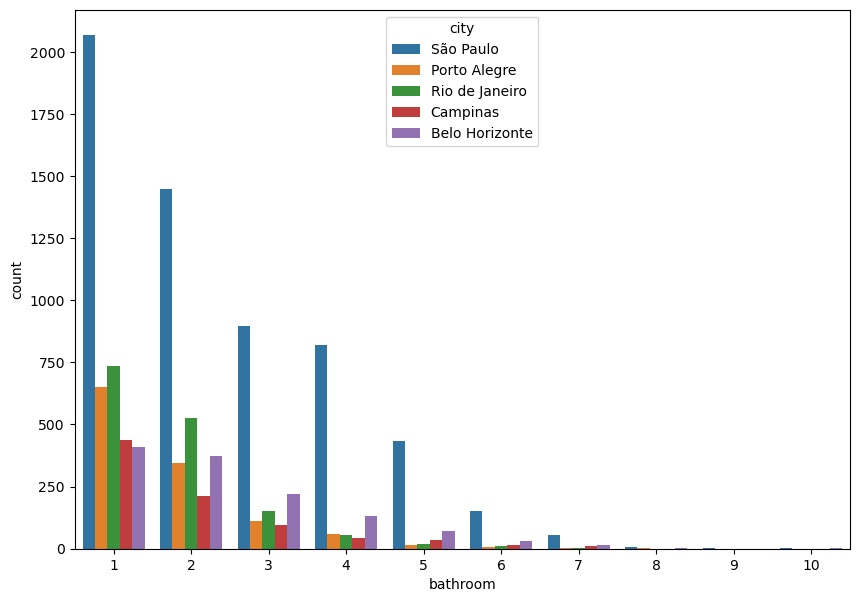

In [26]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "bathroom", hue = "city", data = df)
plt.show()

### Again in Sao PAul city 1,2,3,4 bathroom option are easily available and for other cities they are limited in count

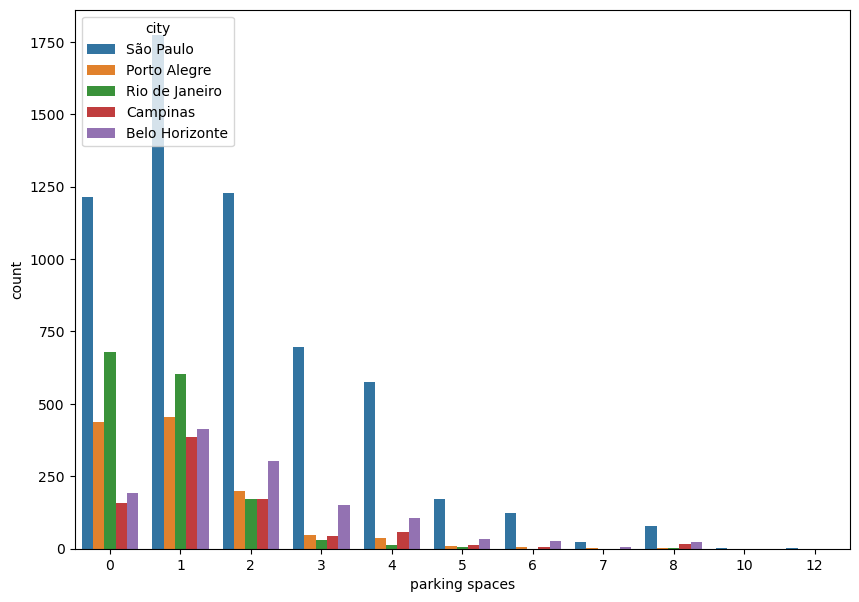

In [27]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "parking spaces", hue = "city", data = df)
plt.show()

### Sao Paulo city have all option for parking spaces you can get 0 to 4 spaces for easily in Sao paulo. And in rest other cities they are limited in count

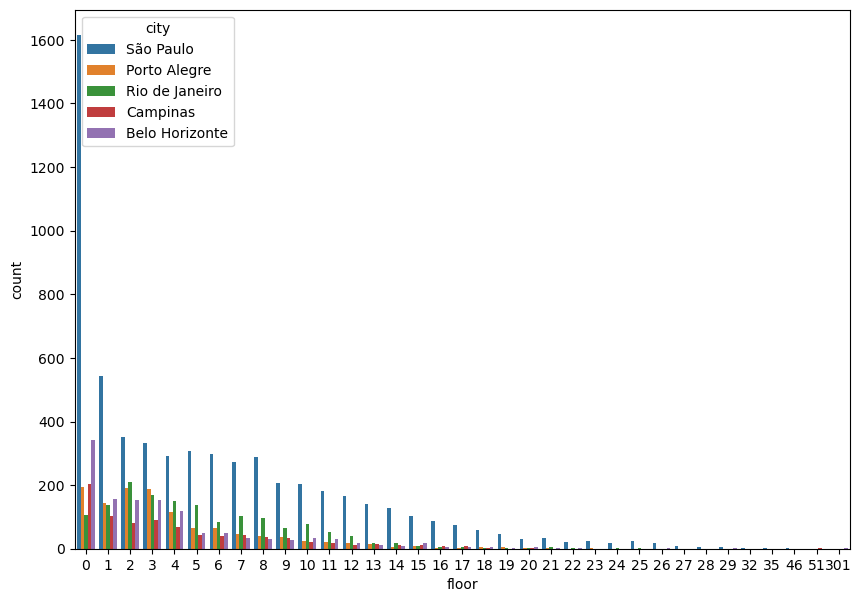

In [28]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "floor", hue = "city", data = df)
plt.show()

### We have a varity of option available in floor of properties. only catch is that higher floor properties are limited in ocunt for each cities

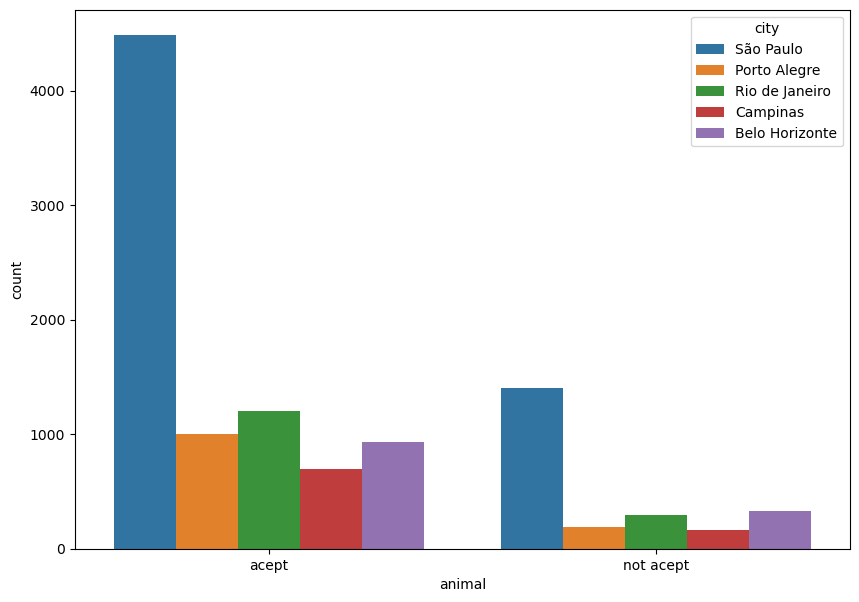

In [29]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "animal", hue = "city", data = df)
plt.show()

### around 4500+ properties in Sao paulo accept animals and around 1000 properties in each other city also allows animals

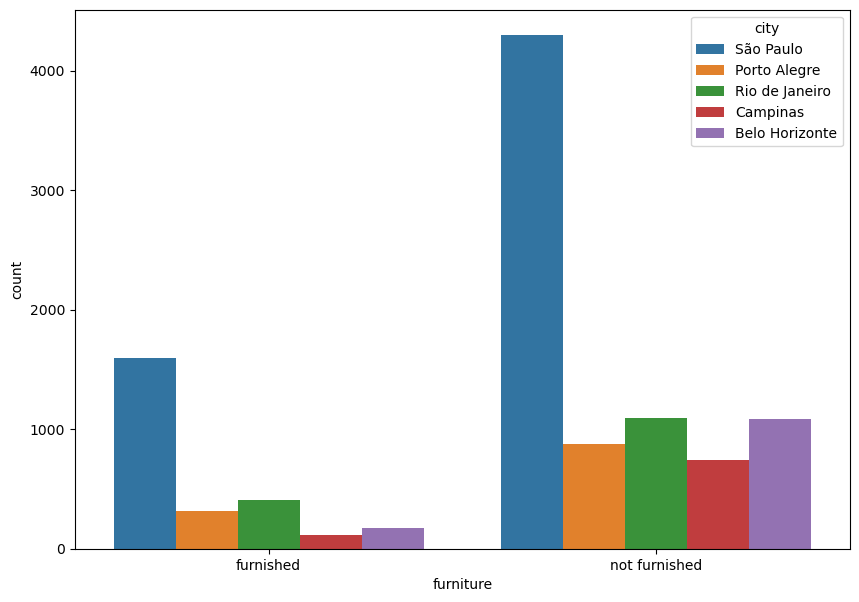

In [30]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "furniture", hue = "city", data = df)
plt.show()

### only around 1500 properties are furnished in Sao paulo and below 500 properties are furnished in other cities. also most of unfrunished properties are present in Sao Paulo (around 4500 in count)

## Bachelor

In [34]:
Bachelor=df[(df['rooms']<=2)&(df['total (R$)']<2000)&(df['parking spaces']<=2)&(df['bathroom']<=2)]

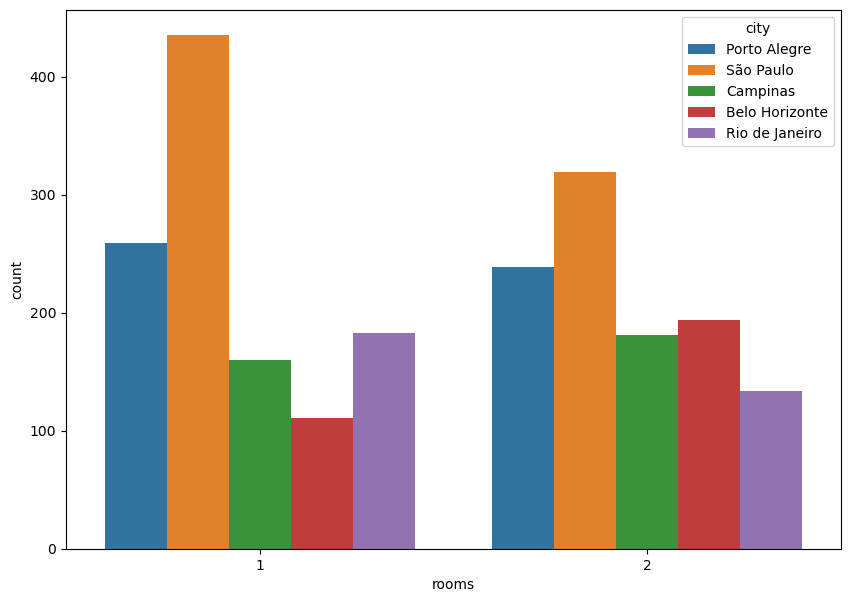

In [35]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "rooms", hue = "city", data = Bachelor)
plt.show()

#### Porto Alegre and Sao Paulo are best city to relocate for bachelors as they have most number of available properties for rent according to critria which meet best for bachelors.
#### we can also consider that all cities are best for bachelors beacuse all cities have more than 100 properties which meet the critria of bachelor

## mid-sized families

In [36]:
mid=df[(df['rooms']>2)&(df['rooms']<=5)&(df['total (R$)']<5000)&(df['parking spaces']>2)&(df['parking spaces']<=4)&(df['bathroom']>=2)&(df['bathroom']<=3)]

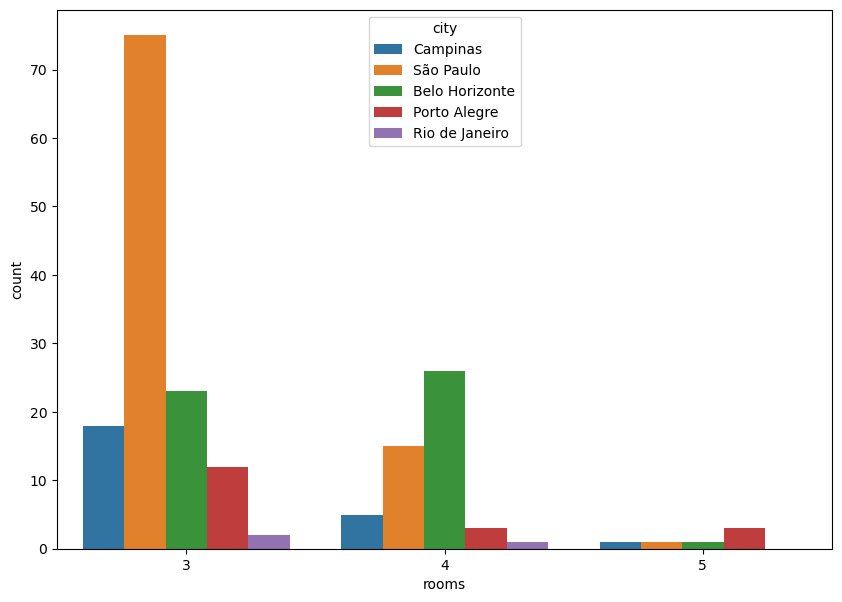

In [37]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "rooms", hue = "city", data = mid)
plt.show()

#### Sao Paulo and Belo Horizonte are best city for mid sized families

## Large Families

In [38]:
df['area'].sort_values()

785        11
6784       12
1588       13
4864       13
1606       15
        ...  
5129     2000
8790     2000
9241    12732
5915    24606
2397    46335
Name: area, Length: 10692, dtype: int64

In [39]:
large=df[(df['rooms']>4)&(df['rooms']<=13)&(df['area']>100)&(df['parking spaces']>4)&(df['parking spaces']<=13)&(df['bathroom']>4)]

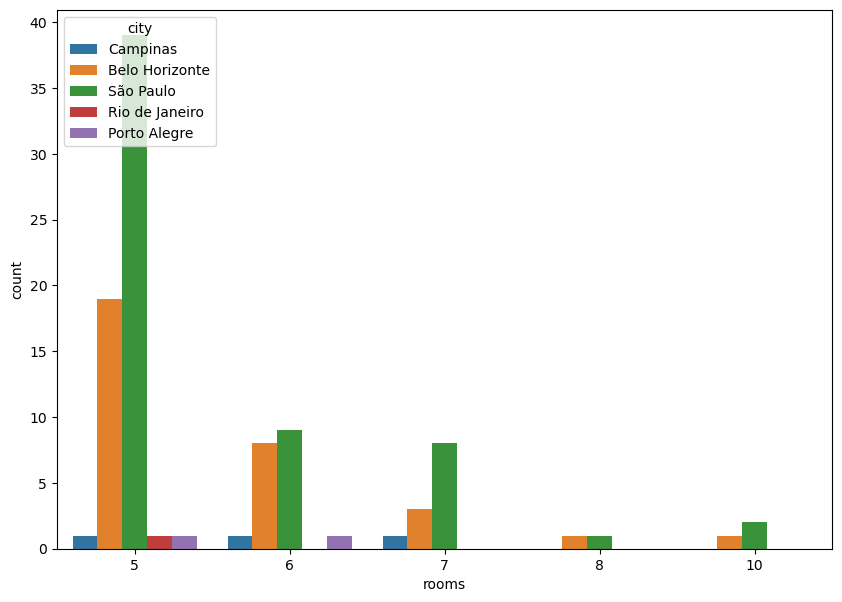

In [40]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "rooms", hue = "city", data = large)
plt.show()

#### Sao Paulo and Belo Horizonte are best city for large sized families